# This is our notebook for our web scraping code

This is where we can add more information about the code we are **running**/*writing*

In [1]:
# import librarys required for web scraping tools
from bs4 import BeautifulSoup
from datetime import datetime, date
#import timestring # this is what this has become in Python 3
import time
import sys
from time import strftime
#from urllib import urlopen
# The help us access the web pages
import urllib3
import certifi
import numpy as np
#import os
import matplotlib.pyplot as plt
#from IPython.display import HTML


In [2]:
# Current offering we are investigating (can be automated)
#this it the formatting in the web addresses - check each semester
semno = '-S3-'#'-S1-'#'-S2-'
semnum = ['-S1-','-S2-','-S3-','-FY']
#order of preferred offerings (for course specs)
semmode = ['WEB','EXT','ONC'] # Anita these offine (e.g. online?)
semonc = ['TWMBA','SPRNG','IPSCH']

In [3]:
# what year are we interested in: 
yr = 2018 # this can be automated at a later time.
# We need to set up the path for time tables.  
usqpathtime='https://www.usq.edu.au/timetables/' 
# We need to update if the website changes
# We need to set up the path for the course specifications.  
usqpathspecs='http://www.usq.edu.au/course/specification/'
# course synopsis
usqpathgen='http://www.usq.edu.au/course/synopses/'
# Read dates (e.g. start of semester) so we don't have to 
# type them in each semester/time we run the code
dateusq = 'https://www.usq.edu.au/current-students/academic/academic-calendar'
# To get the course specifications for specific years.
usqurl=usqpathspecs+str(yr)

In [4]:
#Do you want to save files?
#Specify directory path here:
nowdate=datetime.now()
#os.getcwd()+
#fname="\\"+str(nowdate.strftime("%Y%m%d_%H%M"))+"\\"+str(yr)+semno+"\\"
fid=str(yr)+semno+str(nowdate.strftime("%Y%m%d_%H%M"))
#Do we want to save course lists to txt files?
#YES = 1; NO = 0
codelist=1 

#Do we want to save ASCED to txt file?
#YES = 1; NO = 0
ASCEDlist=1 

#How do you want to sort courses?
#disciplines = 1 or  referencing system = 2
sortby = 1

#Do you want to print COURSE TEXT LISTS GRABS (for library stocking)
#YES = 1; NO = 0
booklist = 0

#filter by year level?
#FIRST_YEAR = 1; ALL = 0
yrlevel=1

#What is the last week number in Semester 1?
lenSEM01 = 20
#What is the last week number in Semester 2?
lenSEM02 = 18

In [5]:
# initialise variables
weeknum = []
weekdatest = []
weektype = []
counter = 0
allurl = []
callurl=[]
onccamp=[] 

**set up all the fucntions required throughout the code**

In [6]:
def geturl(usqurl):
    http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
    page = http.request('GET', usqurl) # import the page we are interested in (e.g. dateusq)
    soup = BeautifulSoup(page.data,"lxml")
    #page=urllib3.urlopen(usqurl)   
    #soup = BeautifulSoup(page,"html")
    tablelnk=soup.find("table", id="usqcoursetable")                
    for cxml in tablelnk.find_all('a'):
        coursexml=str(cxml.get('href')) 
        allurl.append(usqurl+"/"+coursexml)
    return allurl

In [7]:
def geturlcourse(cusqurl):
    # page=urllib2.urlopen(cusqurl)
    http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
    page = http.request('GET', cusqurl) # import the page we are interested in (e.g. dateusq)
    soup = BeautifulSoup(page.data,"lxml")
    tablelnk=soup.find('table', {'class':'usqoffertable'})


In [8]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins)-1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins)+2, bin_w), bins, **kwargs)

In [9]:
#course texts capture information for LIBRARY 
booktype=["textmaterials","referencematerials"]
#keep double inverted commas and square brackets      
booksty=[["BK01"], ["OT01"], ["EB01"]]

In [10]:
#course discipline information(broadly speaking - more refinements later)
engdscp=["School of Civil Engineering and Surveying","School of Mechanical and Electrical Engineering","School of Agric, Comp and Environ Sciences"]              
mgtcomlawdscp=["School of Law and Justice","School of Commerce","School of Management and Enterprise"]
heawblscidscp=["School of Nursing and Midwifery","School of Psychology and Counselling","School of Health and Wellbeing"]
artcommndscp=["School of Arts and Communication","Open Access College","Coll for Indigenous Studies, Education & Research"]
CISERspec=["ANT3006"]
edudscp=["School of Linguistics, Adult and Specialist Educ"]

In [11]:
#library referencing sorting information (broadly speaking - more refinements later)
APAcode=["School of Nursing and Midwifery","School of Psychology and Counselling","School of Health and Wellbeing","School of Arts and Communication","Open Access College","Coll for Indigenous Studies, Education & Research","School of Linguistics, Adult and Specialist Educ","School of Agric, Comp and Environ Sciences"]        
Harvardcode=["School of Commerce","School of Management and Enterprise","School of Civil Engineering and Surveying","School of Mechanical and Electrical Engineering"]          
AGLCcode=["School of Law and Justice"]   

In [12]:
#assessment types
rmvatype=["Quiz","QUIZ","Online", "On Line","CMA", "On line", "ONLINE"]

In [13]:
#page = urllib3.urlopen(dateusqurl)
http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
page = http.request('GET', dateusq) # import the page we are interested in (e.g. dateusq)
soup = BeautifulSoup(page.data,"lxml")

#print(soup) # returns the raw html for scraping

In [14]:
# looking for specific information on the webpage
tablelnk3=soup.find('table', attrs={'class':'table table-striped'})
# print(tablelnk3)

In [15]:
for td_tag in tablelnk3.find_all('td'):
# print td_tag.string
    if td_tag.string != None:
    # print td_tag.string
        if counter%3 == 0:
            weeknum.append(td_tag.string)
        elif counter%3 == 1:
            weekdatest.append(td_tag.string) 
        elif counter%3 == 2:
            weektype.append(td_tag.string)  
    counter+=1

In [16]:
# spliting the strings
# need to find the first week of semester! (or other interesting week)
# worduniweek0 = weekdatest[0].split('-', 1 )[0]
# print(worduniweek0)

In [17]:
worduniweek0 = weekdatest[0].split('-', 1 )[0]
worduniweek0 = worduniweek0.encode('ascii', 'ignore').decode('ascii')
print('first week of semester 1: '+worduniweek0+' '+str(yr))
     
week0full=datetime.strptime(worduniweek0+' '+str(yr), '%d %b %Y')        
print('computer format: ')
print(week0full)
        
 # fulldatewk0=datetime.strptime(week0full,"%Y-%m-%d")
# check this every year
#SEMESTER 1 WEEK NUMBER
startwk = datetime.date(week0full).isocalendar()[1]
print('Week of the calendar year: ')
print(startwk)

#find maximum week number in year (for adjustments in S3)
#by ISO standards, last week of year ALWAYS has 28 December in it
findmaxwkno = date(yr, 12, 28)
maxwkno = findmaxwkno.isocalendar()[1]

# raise SystemExit(0) # <- kill switch for the code
oldcode = ""

first week of semester 1: 26 Feb 2018
computer format: 
2018-02-26 00:00:00
Week of the calendar year: 
9


In [18]:
#fulldatewk0 = datetime.strptime(week0full,"%Y-%m-%d")
#print(fulldatewk0)

Set up the other start of the other semesters

In [19]:
# to find the maximum week number each year
maxwkno = int(strftime("%U",time.strptime("31 Dec "+str(yr), "%d %b %Y")))
#print(maxwkno)

In [20]:
# using urllib3 to get pages
#http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
#page = http.request('GET', dateusq) # import the page we are interested in (e.g. dateusq)
#soup = BeautifulSoup(page.data,"lxml")

In [21]:
allurl=geturl(usqurl)
# print(allurl)
# type(allurl)

## This is where we are up to! 

In [22]:
"""
This is now working and takes a long time to run (not an error). -> CHECK OUT THE PROGRESS BAR
this is finding the table classes to pull out the offerings!
"""

#need to remove all the urllib2 referencs!!!! (Don't run yet!!!!!)
# curl stands for counter for the URLs

for curl in range(len(allurl)):  
    http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
    page = http.request('GET', allurl[curl])
    soup = BeautifulSoup(page.data,"xml") 
    # tablelnk=soup.find('table', {'class':'usqoffertable table'})     
    tablelnk=soup.find('table', {'class':'table table-striped linkedtable'})
    #print(tablelnk)
    for cxml in tablelnk.find_all('a'): 
        rowshtml=str(cxml.get('href')) 
        htmlcode0=rowshtml.split('../../specification/'+str(yr)+'/', 1 )[1]
        htmlcode1=htmlcode0.split('-', 1 )[0]
        if oldcode=="": oldcode= htmlcode1 
        newcode=htmlcode1
        if (onccamp!=[] and any(newcode in x1 for x1 in onccamp)) or (onccamp==[]):
            onccamp.append(usqurl+"/"+rowshtml)
            # print(onccamp)
        elif onccamp!=[] and not any(newcode in x1 for x1 in onccamp):                   
            try:
                #this creates a list of possible course offerings in this order of preference 
                #1: TWMBA - WEB
                #2: TWMBA - EXT
                #3: TWMBA - ONC
                #4: SPR - ONC
                #5: IPS - ONC
                preflist=[oldcode, next(val for val in semnum if (any(val in x for x in onccamp))and val==semno), next(val2 for val2 in semmode if any(val2 in x2 for x2 in onccamp)),next(val3 for val3 in semonc if any(val3 in x3 for x3 in onccamp))]                  
                # print(preflist) 
            except:  
                #this is a non event
                semnum
            # KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS            
            # print(oldcode, [val for val in onccamp  if all(x in val in onccamp for x in preflist)])
            # KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS     #KEEP THIS  
            if semno in preflist:
                callurl.extend([val for val in onccamp  if all(x in val in onccamp for x in preflist)])
            onccamp=[]                   
            onccamp.append(usqurl+"/"+rowshtml)           
              
        # print(onccamp)  
        oldcode=newcode
        
        #PROGRESS BAR
        alltime=101
        sofar = int(round(alltime * curl / float(len(allurl))))
        percents = round(100.0 * curl / float(len(allurl)), 1)
        bar = '*' * sofar + '.' * (alltime - sofar)
        sys.stdout.write('[%s] %s%s \r' % (bar, percents, '%'))
        sys.stdout.flush() 

In [23]:
code3letall = []
coursecodeall = []
gencourseinfo = []
ccfacsect = []
ccdscpln = []
ccASCEDall = []
ASCEDcc = []
wght = []
typeass = []
coursecodedue = []
ccdscplndue = []
duedate = []
duewknum = []
duewkuni = []

#LIB BOOKS
coursetxtinfo=[]
ctitletxt = []
coursecode4txt = []
bktype=[]
LIBTxTBK = []
#course code features
strlen=7
codelen=3

for curl2 in range(len(callurl)): 
    cusq = callurl[curl2]
    #print(cusq)
    start=cusq.find('-S'or'-Y')-strlen
    coursecode=cusq[start:start+strlen]
    #3 letter code only
    code3let=cusq[start:start+codelen]
    if code3let not in code3letall:
        code3letall.append(code3let)
    coursecodeall.append(coursecode)  
    #print(coursecodeall)
    try:
        gencourseinfo.append(usqpathgen+str(yr)+"/"+coursecode+".html")
    except:
        print(str(usqpathgen+str(yr)+"/"+coursecode+".html"))
    updccodethmlist=1 
    #these lines below may be needed to be updated 
    #This retrieves ASCED codes and course sorting information 
    if updccodethmlist==1:
        http2 = urllib3.PoolManager(cert_reqs = 'CERT_REQUIRED',ca_certs = certifi.where())
        page2 = http2.request('GET', gencourseinfo[curl2])
        soup2 = BeautifulSoup(page2.data,'xml')
        getinfo = soup2.findAll('tr')[2].findAll('td')
        for td_tag2 in getinfo:
            if ('Faculty or Section :' not in td_tag2.text):
                ccfac = td_tag2.text
                ccfacsect.append(ccfac)
                
        getinfo = soup2.findAll('tr')[3].findAll('td')
        for td_tag2 in getinfo:
            if ('School or Department :' not in td_tag2.text):
                ccdscp = td_tag2.text
                ccdscpln = [].append(ccdscp) 

        getinfo = soup2.findAll('tr')[5].findAll('td')
        for td_tag2 in getinfo:
            if ('ASCED code :' not in td_tag2.text):
                ccASCED = td_tag2.text
                ccASCEDall.append(str(ccASCED)) 
    ASCEDcc.append(str(coursecode)+ '; ' + str(ccASCED)+ '; ' + str(ccdscp) + '; ' + str(ccfac))     
    
    #this retrieves assessment due dates
    http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
    cpage = http.request('GET', callurl[curl2])
    casssoup = BeautifulSoup(cpage.data,"html") 
    #print(casssoup) 
    casstablnk=casssoup.find('div', {'id':'assessmentdetails'})
    indexcount=0
    tagcount=0
    if casstablnk != None:
        for th_tag in casstablnk.find_all('th'):
            indexcount += 1
            if "Wtg" in th_tag.text:
                indxWtg = indexcount
            if "Description" in th_tag.text:
                indxAsmt = indexcount
        for td_tag in casstablnk.find_all('td'):
            tagcount += 1
            if tagcount % indexcount == indxWtg:
                wghtasg = td_tag.text
            if tagcount % indexcount == indxWtg:
                typeasg = td_tag.text
            if str(yr) in td_tag.text or str(yr+1) in td_tag.text or str(yr-1) in td_tag.text:
                wght.append(wghtasg)
                typeass.append(typeasg)
                coursecodedue.append(coursecode)
                ccdscplndue.append(ccdscp)
                duedate.append(td_tag.text)
                if semno == '-S1-':
                    duewkuni = int(strftime('%U',time.strptime(td_tag.text, '%d %b %Y')))- startwk + 1
                    #print(coursecode, ": Date =",td_tag.text, "& Wk:", duewkuni)#<- run this to check that wk numbers match up with academic calendar
                elif semno == '-S2-':
                    duewkuni = int(strftime('%U',time.strptime(td_tag.text, '%d %b %Y')))- startwk + 1 - lenSEM01
                    #print(coursecode, ": Date =",td_tag.text, "& Wk:", duewkuni)#<- run this to check that wk numbers match up with academic calendar
                elif semno == '-S3-':
                    duewkuni = int(strftime('%U',time.strptime(td_tag.text, '%d %b %Y'))) - startwk + 1 - (lenSEM01 + lenSEM02) +1
                    if duewkuni <0:    
                        duewkuni = duewkuni + maxwkno
                    #print(coursecode, ": Date =",td_tag.text, "& Wk:", duewkuni)#<- run this to check that wk numbers match up with academic calendar        
                duewknum.append(duewkuni)        
    else:
        wght.append("100")
        typeass.append("Assignment")
        coursecodedue.append(coursecode)
        ccdscplndue.append(ccdscp)
        duedate.append("TBA")
        duewknum.append(duewkuni)
    
    #COURSE TEXT LISTS GRABS (for library stocking)
    if booklist == 1:
        bksoup = BeautifulSoup(cpage.data,"html") 
        #print(bksoup) 
        for bt in range(len(booktype)):
            for txtmat in bksoup.find_all('div', {'class': booktype[bt]}):
                txtmat_desc=txtmat.descendants
                for d in txtmat_desc:
                    if txtmat_desc != None:
                        if d.name == 'div' and d.get('class','') in booksty:
                            #print(d.text)
                            cbkinfo=d.text
                            coursetxtinfo.append(d.text)
                        if d.name == 'i' and d.get('class','') == ['title']:
                            titlebk=d.text
                            ctitletxt.append(titlebk)
                            coursecode4txt.append(coursecode)
                            booktypestr=booktype[bt]
                            bktype.append(booktypestr)                                
                            #print(d.text) 
                        else:
                            titlebk=""
                LIBTxTBK.append(str(coursecode) + '; ' + str(booktypestr) + '; ' + str(titlebk) + '; ' + str(cbkinfo))                            
    
    #PROGRESS BAR
    alltime=101
    sofar = int(round(alltime * curl2 / float(len(callurl))))
    percents = round(100.0 * curl2 / float(len(callurl)), 1)
    bar = 'X' * sofar + '.' * (alltime - sofar)
    sys.stdout.write('[%s] %s%s \r' % (bar, percents, '%'))
    sys.stdout.flush() 
                

In [24]:
#prep for histograms (disciplines)
histvalmatWk=[]
histvalHDRWk=[]
histvalEDUWk=[]
histvalENGBENVITWk=[]
histvalMGTCOMLAWWk=[]
histvalARTCOMMNWk=[]
histvalHEAWBLSCIWk=[]  
             
histcstartmatWk=[]
histcstartHDRWk=[]
histcstartEDUWk=[]
histcstartENGBENVITWk=[]
histcstartMGTCOMLAWWk=[]
histcstartARTCOMMNWk=[]
histcstartHEAWBLSCIWk=[] 

#prep for course code txt lists (disciplines)
mathcodelist=[]
hdrcodelist=[]
heawblscilist=[]
engbenvitlist=[]
mgtcomlawlist=[]
artcommnlist=[]
educodelist=[]

plotduewkno=[]

#prep for histograms (referencing styles)      
histvalAPAWk=[]
histvalHarvardWk=[]
histvalAGLCWk=[] 

histcstartAPAWk=[]
histcstartHarvardWk=[]
histcstartAGLCWk=[]     

#prep for course code txt lists (referencing styles)
APAcodelist=[]
Harvardcodelist=[]        
AGLCcodelist=[] 

In [25]:
for indexnum, (wknum,codeno,ccdscpl,wno,typelab) in enumerate(zip(duewknum,coursecodedue,ccdscplndue,wght,typeass)):
#first year courses, include this term     -->   #and codeno[3]=="1"
    if yrlevel == 1: 
        codeyr=["1","2"]
    elif yrlevel == 0: #ALL 
        codeyr=["1","2","3","4","5","6","7","8","9"]
        #if sorting by [1]
    if sortby == 1:
        if ((codeno[3] in codeyr)and(codeno[0:3]=="MAT" or codeno[0:3]=="ENM"  or codeno[0:3]=="STA" or codeno[0:6]=="TPP718" or codeno[0:7]=="TPP7160"or codeno[0:6]=="EAP738" or codeno[0:7]=="DIP1003"or codeno[0:7]=="DIP1004")):  
                histvalmatWk.append(indexnum)
                mathcodelist.append(codeno)
                plotduewkno.append(wknum)
  
        elif ((codeno[3] in codeyr)and(codeno[3]=="9" or codeno[0:3]=="WRP"or codeno[0:3]=="RES" or ((codeno[3]=="8" or codeno[3]=="9") and (codeno[0:3]=="SCI" or codeno[0:3]=="EDR" or codeno[0:3]=="BUS"or codeno[0:3]=="MSC")))
                and not any(x in typelab for x in rmvatype)):                    
                histvalHDRWk.append(indexnum)
                hdrcodelist.append(codeno)
                plotduewkno.append(wknum)
                
        elif ((codeno[3] in codeyr)and(codeno[0:2]=="ED" or ccdscpl in edudscp) and not any(x in typelab for x in rmvatype)):
                histvalEDUWk.append(indexnum)
                educodelist.append(codeno)
                plotduewkno.append(wknum)
                    
        elif ((codeno[3] in codeyr)and(ccdscpl in engdscp or codeno[0:3]=="ENG" or codeno[0:3]=="CIS"or codeno[0:3]=="CSC") and not any(x in typelab for x in rmvatype)):
                histvalENGBENVITWk.append(indexnum)
                engbenvitlist.append(codeno)
                plotduewkno.append(wknum)

        elif ((codeno[3] in codeyr)and(ccdscpl in heawblscidscp)):# and not any(x in typelab for x in rmvatype)):
                histvalHEAWBLSCIWk.append(indexnum)
                heawblscilist.append(codeno)
                plotduewkno.append(wknum)

        elif ((codeno[3] in codeyr)and((ccdscpl in artcommndscp) or (codeno[0:3]=="IPP" or codeno[0:3]=="ISE" or codeno[0:3]=="KNL") or codeno in CISERspec) and not any(x in typelab for x in rmvatype)):
                histvalARTCOMMNWk.append(indexnum)
                artcommnlist.append(codeno)
                plotduewkno.append(wknum)

        elif ((codeno[3] in codeyr)and(ccdscpl in mgtcomlawdscp) and not any(x in typelab for x in rmvatype)):
                histvalMGTCOMLAWWk.append(indexnum)
                mgtcomlawlist.append(codeno)
                plotduewkno.append(wknum)
    elif sortby == 2:       
        if ((ccdscpl in APAcode) or (codeno[0:3]=="AVN") ):# and not any(x in typelab for x in rmvatype)):
                histvalAPAWk.append(indexnum)
                APAcodelist.append(codeno)
                plotduewkno.append(wknum)
        elif ((ccdscpl in Harvardcode) and not (codeno[0:3]=="AVN") ):# and not any(x in typelab for x in rmvatype)):
                histvalHarvardWk.append(indexnum)
                Harvardcodelist.append(codeno)
                plotduewkno.append(wknum)
        elif ((ccdscpl in AGLCcode)):# and not any(x in typelab for x in rmvatype)):
                histvalAGLCWk.append(indexnum)
                AGLCcodelist.append(codeno)
                plotduewkno.append(wknum)

In [26]:
#writing lists of courses to files
if ASCEDlist == 1:
    fASCEDpath="ASCEDcc_"+fid+".txt"  
    fASCEDcode = open(fASCEDpath, "w")
    fASCEDcode.write("\n".join(map(lambda x: str(x), ASCEDcc)))
    fASCEDcode.close()       
        
if codelist == 1:    
    if sortby == 1:
        #write lists to files (disciplines)        
        setmathcodelist=set(mathcodelist)
        fmathpath="mathcodelist_"+fid+".txt"
        #fmath = open("mathcodelist_2017S2.txt", "w")
        fmath = open(fmathpath, "w")
        fmath.write("\n".join(map(lambda x: str(x), setmathcodelist)))
        fmath.close()

        sethdrcodelist=set(hdrcodelist)        
        fhdrpath="hdrcodelist_"+fid+".txt"         
        #fhdr = open("hdrcodelist_2017S2.txt", "w")
        fhdr = open(fhdrpath, "w")
        fhdr.write("\n".join(map(lambda x: str(x), sethdrcodelist)))
        fhdr.close()

        seteducodelist=set(educodelist)
        fedupath="educodelist_"+fid+".txt"  
        #fedu = open("educodelist_2017S2.txt", "w")
        fedu = open(fedupath, "w")
        fedu.write("\n".join(map(lambda x: str(x), seteducodelist)))
        fedu.close()
        
        setengbenvitlist=set(engbenvitlist)
        fengitpath="engbenvitlist_"+fid+".txt"  
        #fengit = open("engbenvitlist_2017S2.txt", "w")
        fengit = open(fengitpath, "w")
        fengit.write("\n".join(map(lambda x: str(x), setengbenvitlist)))
        fengit.close()

        setartcommnlist=set(artcommnlist)
        fcomartpath="artcommnlist_"+fid+".txt"  
        #fcomart = open("artcommnlist_2017S2.txt", "w")
        fcomart = open(fcomartpath, "w")
        fcomart.write("\n".join(map(lambda x: str(x), setartcommnlist)))
        fcomart.close()

        setmgtcomlawlist=set(mgtcomlawlist)
        fbusmanpath="mgtcomlawlist_"+fid+".txt"  
        #fbusman = open("mgtcomlawlist_2017S2.txt", "w")
        fbusman = open(fbusmanpath, "w")
        fbusman.write("\n".join(map(lambda x: str(x), setmgtcomlawlist)))
        fbusman.close()
        
        setheawblscilist=set(heawblscilist)
        fsciheapath="heawblscilist_"+fid+".txt"  
        #fscihea = open("heawblscilist_2017S2.txt", "w")
        fscihea = open(fsciheapath, "w")
        fscihea.write("\n".join(map(lambda x: str(x), setheawblscilist)))
        fscihea.close()
        
    elif sortby == 2:        
        
        setAPAcodelist=set(APAcodelist)        
        fAPApath="APAcodelist_"+fid+".txt"        
        fAPA = open(fAPApath, "w")
        fAPA.write("\n".join(map(lambda x: str(x), setAPAcodelist)))
        fAPA.close()
        
        setHarvardcodelist=set(Harvardcodelist)        
        fHarvardpath="Harvardcodelist_"+fid+".txt"        
        fHarvard = open(fHarvardpath, "w")
        fHarvard.write("\n".join(map(lambda x: str(x), setHarvardcodelist)))
        fHarvard.close()

        setAGLCcodelist=set(AGLCcodelist)        
        fHarvardpath="AGLCcodelist_"+fid+".txt"        
        fAGLC = open(fHarvardpath, "w")
        fAGLC.write("\n".join(map(lambda x: str(x), setAGLCcodelist)))
        fAGLC.close()

In [27]:
#write library book lists
if booklist == 1:
        fLibTXTpath="CourseTexts_"+fid+".txt"  
        fLibTXTcode = open(fLibTXTpath, "w")
        fLibTXTcode.write("\n".join(map(lambda x: str(x), LIBTxTBK)))
        fLibTXTcode.close() 

In [28]:
#prepare histogram data
if sortby==1:                
    histcstartmatWk=[duewknum[i] for i in histvalmatWk]
    histcstartHDRWk=[duewknum[i] for i in histvalHDRWk]
    histcstartHEAWBLSCIWk=[duewknum[i] for i in histvalHEAWBLSCIWk]
    histcstartEDUWk=[duewknum[i] for i in histvalEDUWk]        
    histcstartARTCOMMNWk=[duewknum[i] for i in histvalARTCOMMNWk]
    histcstartMGTCOMLAWWk=[duewknum[i] for i in histvalMGTCOMLAWWk]
    histcstartENGBENVITWk=[duewknum[i] for i in histvalENGBENVITWk]

elif sortby==2:            
    histcstartAPAWk=[duewknum[i] for i in histvalAPAWk]
    histcstartHarvardWk=[duewknum[i] for i in histvalHarvardWk]
    histcstartAGLCWk=[duewknum[i] for i in histvalAGLCWk]   

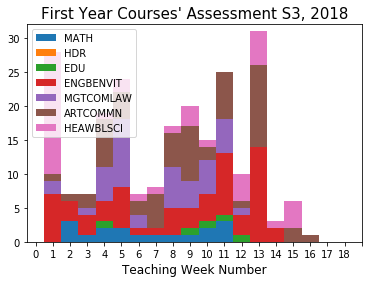

In [30]:
#plot histogram

fig=plt.figure()
sub1 = fig.add_subplot(111)
if yrlevel==0:
    histtitle="All Courses\' Assessment "+semno[1:-1]+", "+str(yr)
elif yrlevel == 1:    
    histtitle="First Year Courses\' Assessment "+semno[1:-1]+", "+str(yr)
sub1.set_title(histtitle,size=15)
graphbins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] 

#awkcount=np.zeros(len(graphbins))        
##find max number of assignments in wk (overall)    
#for awk in range (len(graphbins)):
#    awkcount[awk]=np.shape(np.where(np.asarray(duewknum) == graphbins[awk]))[-1]
#create a dictionary which determines number of assessments due each week 
#first sort the array
d = {x:plotduewkno.count(x) for x in plotduewkno}
awknum, adue = d.keys(), d.values()

if sortby==1:   
    datacourse=[histcstartmatWk,histcstartHDRWk,histcstartEDUWk,histcstartENGBENVITWk,histcstartMGTCOMLAWWk,histcstartARTCOMMNWk,histcstartHEAWBLSCIWk]
    legendlst=["MATH", "HDR", "EDU", "ENGBENVIT", "MGTCOMLAW", "ARTCOMMN","HEAWBLSCI"]         
elif sortby==2: 
    datacourse=[histcstartAPAWk,histcstartHarvardWk,histcstartAGLCWk]            
    legendlst=["APA", "Harvard", "AGLC"]    
    #print(datacourse)

n1,bins1,patches=sub1.hist(datacourse,bins=graphbins, stacked=True)            
plt.legend(legendlst,loc='upper left')       
plt.xlabel("Teaching Week Number",size=12)
plt.ylabel("",size=25)
plt.axis([0, max(graphbins), 0, max(adue)+1])
bins_labels(graphbins, fontsize=10)
plt.show()